In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/prksh/Downloads/RegressionModels/logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
df.shape

(396030, 27)

In [4]:
# Observation of datatype and null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
# Extraction of year from the 'Earliest Credit Line' column
df['ecl_year'] = df['earliest_cr_line'].str.split('-').str[-1]

# Conversion of datatype from 'String' to 'Integer' for the 'Earliest Credit Line Year' column
df['ecl_year'] = pd.to_numeric(df['ecl_year'])

In [7]:
# Extraction of pincode from the 'Address' column
df['pin_code'] = df['address'].str.split(' ').str[-1]

In [8]:
# Extraction of pincode from the 'Address' column
df['issue_d_y'] = df['issue_d'].str.split('-').str[-1]

# Conversion of datatype from 'String' to 'Integer' for the 'Issue Date Year' column
df['issue_d_y'] = pd.to_numeric(df['issue_d_y'])

In [9]:
# Dropping the columns from which the requried data is extracted above
columns_to_drop = ['earliest_cr_line', 'address', 'issue_d']
df = df.drop(columns=columns_to_drop)

In [18]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,pin_code
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,394275,396030,396030,396030
unique,2,7,35,173105,11,6,3,2,14,48817,2,3,10
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL,70466
freq,302005,116018,26655,4389,126041,198348,139563,318357,234507,152472,238066,395319,56985


In [10]:
numerical_columns = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
    'mort_acc', 'pub_rec_bankruptcies'
]

categorical_columns = [
    'term', 'grade', 'sub_grade', 
    'home_ownership', 'verification_status', 'loan_status', 'initial_list_status', 
    'application_type'
]


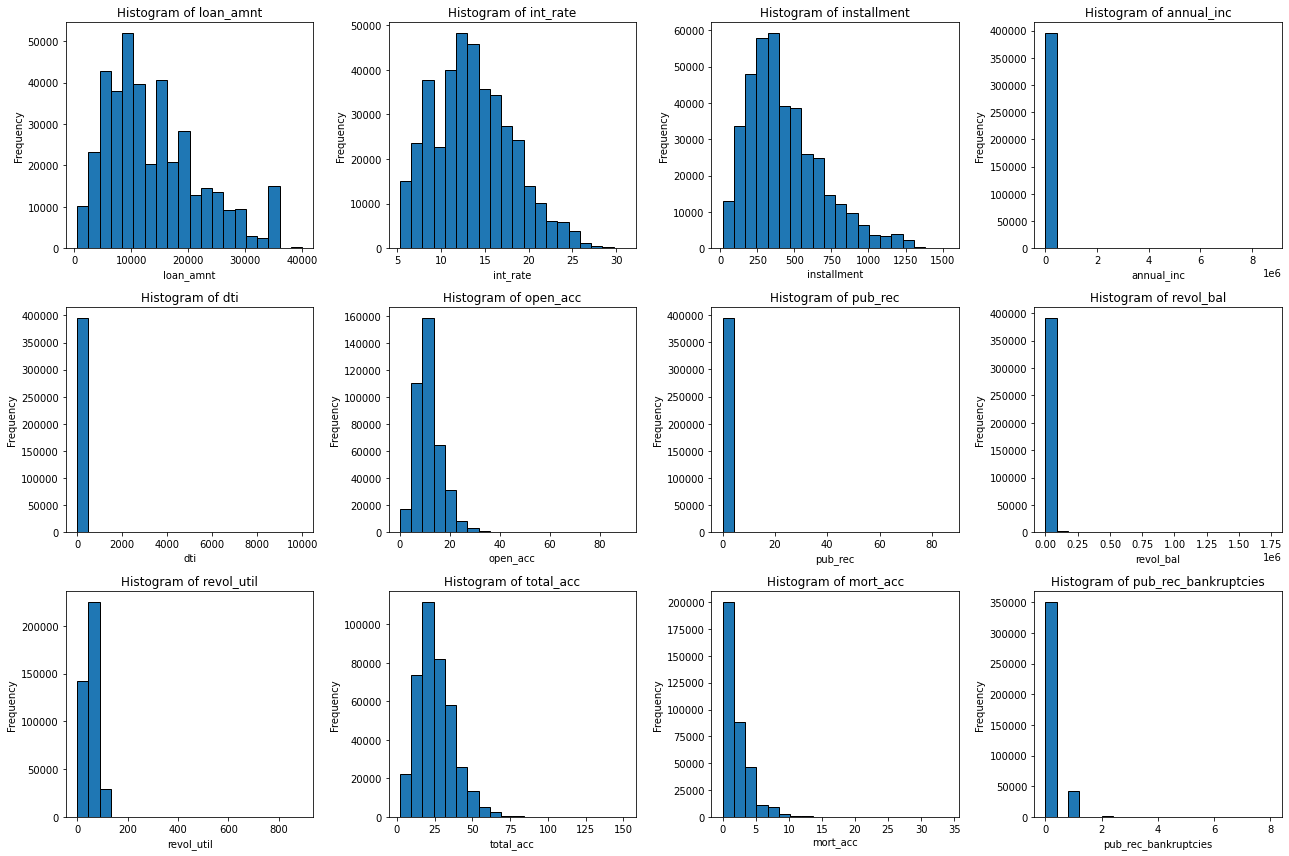

In [13]:
# Create subplots for histograms
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot histograms for each numerical variable
for i, column in enumerate(numerical_columns):
    axs[i].hist(df[column], bins=20, edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

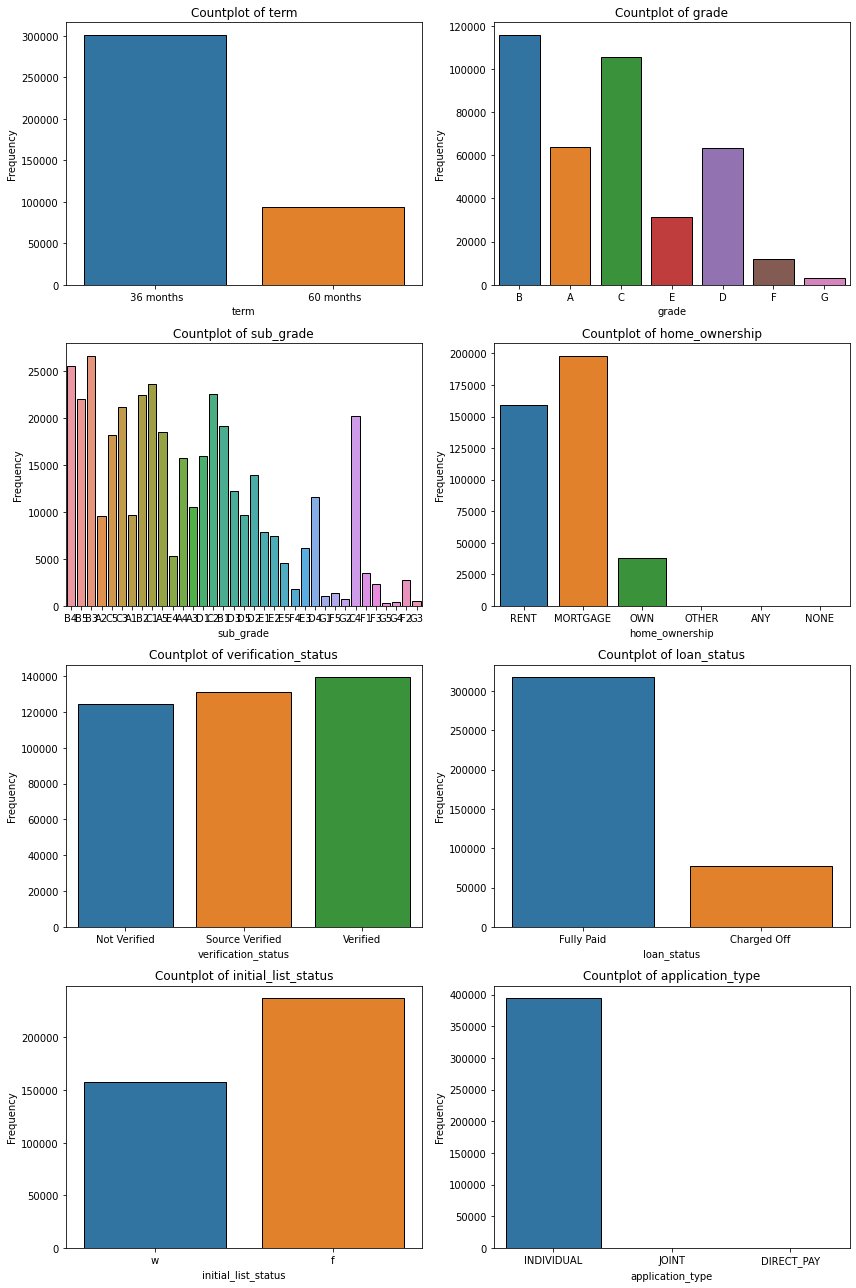

In [24]:
## Categorical Columns EDA

fig, axs = plt.subplots(4, 2, figsize=(12, 18))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot countplot for each categorical variable
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], ax=axs[i], edgecolor='black')
    axs[i].set_title(f'Countplot of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
title                    1755
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
ecl_year                    0
pin_code                    0
issue_d_y                   0
dtype: int64

In [19]:
## removing unnecessary columns

df.drop(['emp_title', 'emp_length', 'mort_acc', 'title'], axis=1, inplace=True)

In [22]:
df.dropna(how='any', axis=0,inplace = True)
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
pub_rec_bankruptcies    0
ecl_year                0
pin_code                0
issue_d_y               0
dtype: int64

#### Target Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
label_encoder = LabelEncoder()


In [35]:
df['term'] = label_encoder.fit_transform(df['term'])
df['grade'] = label_encoder.fit_transform(df['grade'])
df['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
df['verification_status'] = label_encoder.fit_transform(df['verification_status'])
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df['purpose'] = label_encoder.fit_transform(df['purpose'])
df['pub_rec'] = label_encoder.fit_transform(df['pub_rec'])
df['initial_list_status'] = label_encoder.fit_transform(df['initial_list_status'])
df['application_type'] = label_encoder.fit_transform(df['application_type'])
df['pub_rec_bankruptcies'] = label_encoder.fit_transform(df['pub_rec_bankruptcies'])


#### Feature engineering

In [36]:
df['pub_rec'] = np.where(df['pub_rec'] != 0.0,1,0)
df['mort_acc'] = np.where(df['pub_rec'] != 0.0,1,0)
df['pub_rec_bankruptcies'] = np.where(df['pub_rec'] != 0.0,1,0)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  int64  
 5   sub_grade             395219 non-null  int64  
 6   home_ownership        395219 non-null  int64  
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  int64  
 9   loan_status           395219 non-null  int64  
 10  purpose               395219 non-null  int64  
 11  dti                   395219 non-null  float64
 12  open_acc              395219 non-null  int64  
 13  pub_rec               395219 non-null  int32  
 14  revol_bal             395219 non-null  float64
 15  